In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# Leer el CSV
df = pd.read_csv('../data/data_divorce.csv')

## Descripción General del Conjunto de Datos

In [14]:
# Descripcion del conjunto de datos
filas, columnas = df.shape
print(f"Total de registros/observaciones: {filas}")
print(f"Total de variables/columnas: {columnas}")


Total de registros/observaciones: 71576
Total de variables/columnas: 18


Listado de Variables con Tipo y Descripción

In [16]:
# Diccionario con descripción de variables
descripcion_variables = {
    'DEPREG': 'Departamento de registro del divorcio',
    'MUPREG': 'Municipio de registro del divorcio',
    'MESREG': 'Mes de registro del divorcio',
    'AÑOREG': 'Año de registro del divorcio',
    'DIAOCU': 'Día de ocurrencia del divorcio',
    'MESOCU': 'Mes de ocurrencia del divorcio',
    'DEPOCU': 'Departamento de ocurrencia del divorcio',
    'MUPOCU': 'Municipio de ocurrencia del divorcio',
    'EDADHOM': 'Edad del hombre al momento del divorcio',
    'EDADMUJ': 'Edad de la mujer al momento del divorcio',
    'GETHOM': 'Grupo étnico del hombre',
    'GETMUJ': 'Grupo étnico de la mujer',
    'NACHOM': 'Nacionalidad del hombre',
    'NACMUJ': 'Nacionalidad de la mujer',
    'ESCHOM': 'Nivel educativo del hombre',
    'ESCMUJ': 'Nivel educativo de la mujer',
    'OCUHOM': 'Ocupación del hombre',
    'OCUMUJ': 'Ocupación de la mujer'
}

# Clasificación de variables por tipo
variables_categoricas = ['DEPREG', 'MUPREG', 'MESREG', 'AÑOREG', 'MESOCU', 'DEPOCU', 'MUPOCU',
                         'GETHOM', 'GETMUJ', 'NACHOM', 'NACMUJ', 'ESCHOM', 'ESCMUJ',
                         'OCUHOM', 'OCUMUJ']

variables_numericas = ['DIAOCU', 'EDADHOM', 'EDADMUJ']

# Crear tabla descriptiva
tabla_variables = pd.DataFrame({
    'Variable': df.columns,
    'Descripción': [descripcion_variables.get(col, 'Sin descripción') for col in df.columns],
    'Tipo de Dato': df.dtypes.astype(str),
    'Clasificación': ['Numérica' if col in variables_numericas else 'Categórica' for col in df.columns],
    'Valores Únicos': [df[col].nunique() for col in df.columns],
    'Valores Nulos': [df[col].isnull().sum() for col in df.columns]
})

tabla_variables

,Variable,Descripción,Tipo de Dato,Clasificación,Valores Únicos,Valores Nulos
DEPREG,DEPREG,Departamento de registro del divorcio,str,Categórica,22,0
MUPREG,MUPREG,Municipio de registro del divorcio,str,Categórica,331,0
MESREG,MESREG,Mes de registro del divorcio,str,Categórica,12,0
AÑOREG,AÑOREG,Año de registro del divorcio,float64,Categórica,12,0
DIAOCU,DIAOCU,Día de ocurrencia del divorcio,float64,Numérica,31,0
MESOCU,MESOCU,Mes de ocurrencia del divorcio,str,Categórica,12,0
DEPOCU,DEPOCU,Departamento de ocurrencia del divorcio,str,Categórica,22,0
MUPOCU,MUPOCU,Municipio de ocurrencia del divorcio,str,Categórica,331,0
EDADHOM,EDADHOM,Edad del hombre al momento del divorcio,str,Numérica,79,0
EDADMUJ,EDADMUJ,Edad de la mujer al momento del divorcio,str,Numérica,67,0


### Analisis exploratorio de variables categóricas
Tabla de frecuencias de las variables categoricas

Se identificaron estas dentro del conjunto de datos:
DEPREG, MUPREG, MESREG, AÑOREG, MESOCU, DEPOCU, MUPOCU, 
GETHOM, GETMUJ, NACHOM, NACMUJ, ESCHOM, ESCMUJ, OCUHOM, OCUMUJ

In [17]:
# Elegir una de las variables categoricas

# Crear tabla de frecuencias
tabla_freq = pd.DataFrame({
    'Categoría': df['GETHOM'].value_counts().index,
    'Frecuencia': df['GETHOM'].value_counts().values,
    'Porcentaje': (df['GETHOM'].value_counts(normalize=True).values * 100).round(2)
})

# Ordenar por categoría
tabla_freq = tabla_freq.sort_values('Frecuencia', ascending= False).reset_index(drop=True)

#Imprimir tabla
tabla_freq

,Categoría,Frecuencia,Porcentaje
0,Ignorado,37694,52.66
1,Ladino / Mestizo,26933,37.63
2,Maya,5044,7.05
3,No indigena,1117,1.56
4,Otro,513,0.72
5,Indigena,244,0.34
6,Garifuna,22,0.03
7,Xinca,9,0.01


### Analisis exploratorio de variables númericas

En esta sección se realiza un análisis exploratorio de las variables numéricas del conjunto de datos de divorcios registrados en Guatemala durante el periodo 2012–2023. El objetivo es describir su comportamiento mediante medidas estadísticas y visualizaciones básicas, sin utilizar herramientas automáticas de análisis.


#### Identificación de variables numéricas

Se identificaron cuatro variables numéricas en el conjunto de datos:

- DIAOCU: Día de ocurrencia del divorcio.
- EDADHOM: Edad del hombre al momento del divorcio.
- EDADMUJ: Edad de la mujer al momento del divorcio.


In [10]:
num_vars = ['DIAOCU', 'EDADHOM', 'EDADMUJ']
df[num_vars].info()

<class 'pandas.DataFrame'>
RangeIndex: 71576 entries, 0 to 71575
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DIAOCU   71576 non-null  float64
 1   EDADHOM  71576 non-null  str    
 2   EDADMUJ  71576 non-null  str    
dtypes: float64(1), str(2)
memory usage: 1.6 MB


### Medidas de tendencia central y dispersión

Medidas estadísticas descriptivas para las variables numéricas, incluyendo media, mediana, valores mínimos y máximos, así como medidas de dispersión.


In [11]:
for var in num_vars:
    print("\n" f"Descripción de {var}:")
    print(str(df[var].describe()))


Descripción de DIAOCU:
count    71576.000000
mean        15.733584
std          8.683304
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: DIAOCU, dtype: float64

Descripción de EDADHOM:
count        71576
unique          79
top       Ignorado
freq         34795
Name: EDADHOM, dtype: object

Descripción de EDADMUJ:
count        71576
unique          67
top       Ignorado
freq         34721
Name: EDADMUJ, dtype: object


### Distribución de las variables numéricas

A continuación se presentan histogramas para analizar la forma de la distribución de las variables numéricas.

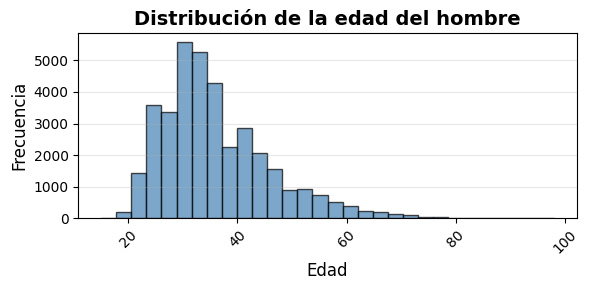

In [12]:
plt.figure(figsize=(6, 3))
plt.hist(pd.to_numeric(df['EDADHOM'], errors='coerce'), bins=30, color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel("Edad", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.title("Distribución de la edad del hombre", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

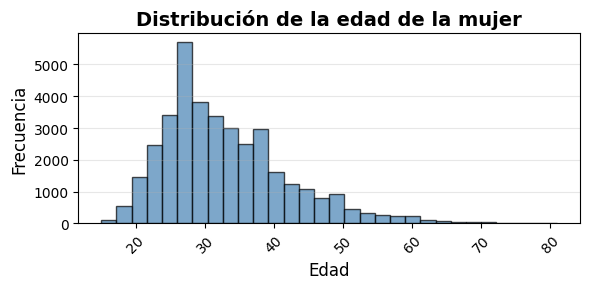

In [13]:
plt.figure(figsize=(6, 3))
plt.hist(pd.to_numeric(df['EDADMUJ'], errors='coerce'), bins=30, color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel("Edad", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.title("Distribución de la edad de la mujer", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Medidas de orden

Las medidas de orden, cuartiles, PARA identificar la dispersión de los datos y la presencia de valores extremos en las variables numéricas.

In [14]:
df_numeric = df[num_vars].copy()
df_numeric['EDADHOM'] = pd.to_numeric(df['EDADHOM'], errors='coerce')
df_numeric['EDADMUJ'] = pd.to_numeric(df['EDADMUJ'], errors='coerce')

df_numeric.quantile([0.25, 0.5, 0.75])


,DIAOCU,EDADHOM,EDADMUJ
0.25,8.0,29.0,26.0
0.50,16.0,34.0,31.0
0.75,23.0,41.0,38.0


### Relaciones y cruce entre variables

In [32]:
# CRUCE: DEPARTAMENTO vs GRUPO ÉTNICO (HOMBRE)

# Filtrar los departamentos más importantes
top_deptos = df['DEPOCU'].value_counts().head(5).index
df_filtered = df[df['DEPOCU'].isin(top_deptos)]

cruce1 = pd.crosstab(df_filtered['DEPOCU'], df_filtered['GETHOM'], 
                     margins=True, margins_name='Total')
cruce1

GETHOM,Garifuna,Ignorado,Indigena,Ladino / Mestizo,Maya,No indigena,Otro,Xinca,Total
DEPOCU,,,,,,,,,
Escuintla,0,1906,0,1484,33,39,19,0,3481
Guatemala,3,16341,17,9329,324,353,162,1,26530
Jutiapa,0,1447,1,1495,15,88,13,5,3064
Quetzaltenango,1,2250,29,2140,832,99,86,0,5437
San Marcos,0,1116,8,1665,170,49,33,0,3041
Total,4,23060,55,16113,1374,628,313,6,41553


In [ ]:
# CRUCE: NIVEL EDUCATIVO HOMBRE vs NIVEL EDUCATIVO MUJER

cruce2 = pd.crosstab(df['ESCHOM'], df['ESCMUJ'], 
                     margins=True, margins_name='Total')
cruce2

ESCMUJ,Basico,Diversificado,Ignorado,Ninguno,Postgrado,Primaria,Universitario,Total
ESCHOM,,,,,,,,
Basico,1189,1676,435,330,1,925,141,4697
Diversificado,1683,7879,1281,643,22,997,1391,13896
Ignorado,426,1442,28341,2076,6,881,404,33576
Ninguno,270,646,1801,4839,5,727,170,8458
Postgrado,3,30,17,2,2,1,41,96
Primaria,979,1123,807,905,0,2851,87,6752
Universitario,144,1622,444,189,19,87,1596,4101
Total,4694,14418,33126,8984,55,6469,3830,71576


In [ ]:
# CRUCE: GRUPO ÉTNICO HOMBRE vs GRUPO ÉTNICO MUJER

cruce3 = pd.crosstab(df['GETHOM'], df['GETMUJ'], 
                     margins=True, margins_name='Total')
cruce3

GETMUJ,Garifuna,Ignorado,Indigena,Ladino / Mestizo,Maya,No indigena,Otro,Xinca,Total
GETHOM,,,,,,,,,
Garifuna,9,5,0,5,1,0,2,0,22
Ignorado,5,33389,47,3384,471,321,76,1,37694
Indigena,0,48,159,0,0,37,0,0,244
Ladino / Mestizo,5,3436,0,22477,648,0,359,8,26933
Maya,0,483,0,1005,3498,0,58,0,5044
No indigena,0,309,20,0,0,788,0,0,1117
Otro,3,91,0,290,57,0,72,0,513
Xinca,0,1,0,6,0,0,0,2,9
Total,22,37762,226,27167,4675,1146,567,11,71576


In [ ]:
# CRUCE: GRUPO ÉTNICO vs NIVEL EDUCATIVO (HOMBRE)

# Filtrar solo grupos étnicos relevantes
grupos_relevantes = ['Indigena', 'Ladino / Mestizo', 'Maya', 'No indigena']
df_filtered2 = df[df['GETHOM'].isin(grupos_relevantes)]

cruce4 = pd.crosstab(df_filtered2['GETHOM'], df_filtered2['ESCHOM'], 
                     margins=True, margins_name='Total')
cruce4

ESCHOM,Basico,Diversificado,Ignorado,Ninguno,Postgrado,Primaria,Universitario,Total
GETHOM,,,,,,,,
Indigena,22,37,45,68,0,67,5,244
Ladino / Mestizo,3485,11219,2706,1558,84,4494,3387,26933
Maya,760,1212,503,768,5,1603,193,5044
No indigena,80,334,233,156,0,183,131,1117
Total,4347,12802,3487,2550,89,6347,3716,33338


In [ ]:
# CRUCE: NIVEL EDUCATIVO vs EDAD (Categorizada)

# Crear categorías de edad
df['EDADHOM_clean'] = pd.to_numeric(df['EDADHOM'], errors='coerce')

def categorizar_edad(edad):
    if pd.isna(edad):
        return 'Desconocido'
    elif edad < 25:
        return '18-24'
    elif edad < 35:
        return '25-34'
    elif edad < 45:
        return '35-44'
    elif edad < 55:
        return '45-54'
    else:
        return '55+'

df['EDAD_CAT_HOM'] = df['EDADHOM_clean'].apply(categorizar_edad)

# Filtrar datos válidos
df_filtered4 = df[df['EDAD_CAT_HOM'] != 'Desconocido']

cruce6 = pd.crosstab(df_filtered4['ESCHOM'], df_filtered4['EDAD_CAT_HOM'], 
                     margins=True, margins_name='Total')

# Reordenar columnas de edad
orden_edad = ['18-24', '25-34', '35-44', '45-54', '55+', 'Total']
cruce6 = cruce6[orden_edad]
cruce6

EDAD_CAT_HOM,18-24,25-34,35-44,45-54,55+,Total
ESCHOM,,,,,,
Basico,623,2479,1002,344,167,4615
Diversificado,1057,7471,3569,1116,407,13620
Ignorado,209,1732,1460,634,309,4344
Ninguno,146,1158,1204,602,404,3514
Postgrado,0,19,43,23,11,96
Primaria,551,2599,1905,929,609,6593
Universitario,43,1370,1684,609,293,3999
Total,2629,16828,10867,4257,2200,36781


In [ ]:
# CRUCE: AÑO DE REGISTRO vs DEPARTAMENTO (Top 5)

# Filtrar solo top 5 departamentos
top5_deptos = df['DEPOCU'].value_counts().head(5).index
df_filtered3 = df[df['DEPOCU'].isin(top5_deptos)]

cruce5 = pd.crosstab(df_filtered3['AÑOREG'], df_filtered3['DEPOCU'], 
                     margins=True, margins_name='Total')
cruce5

DEPOCU,Escuintla,Guatemala,Jutiapa,Quetzaltenango,San Marcos,Total
AÑOREG,,,,,,
2012.0,128,1627,218,238,97,2308
2013.0,201,2328,349,337,105,3320
2014.0,263,1980,333,382,190,3148
2015.0,309,2200,286,379,264,3438
2016.0,314,2148,221,400,229,3312
2017.0,327,2041,195,463,284,3310
2018.0,314,2180,244,512,256,3506
2019.0,384,3514,246,704,338,5186
2020.0,193,1477,133,354,190,2347
